# Connect to drive, load modules and check device

In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
root_path = 'gdrive/MyDrive/ImageNet/'
os.chdir(root_path)

from datasets import *
from nets import *

device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')
print(f"device: {device}")

Mounted at /content/gdrive
device: cuda:0


# Load dataset and create HASYv2Dataset objects.

In [ ]:
# Load dataset into HASYv2Dataset objects.
with open('.//_Data/colab_dataset.pkl', 'rb') as f:
    full_dataset = pickle.load(f)

fold = 2
tds = HASYv2Dataset()
vds = HASYv2Dataset()
tds.cross_val(fold, True, full_dataset)
vds.cross_val(fold, False, full_dataset)
tds.to(device)
vds.to(device)
print(tds.device, vds.device)
print(len(tds), len(vds))
del full_dataset    # In order to avoid using all of the available memory

cuda:0 cuda:0
151288 16945


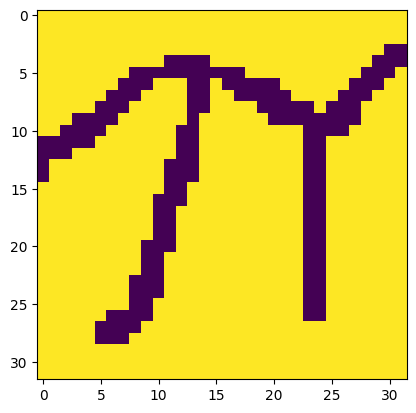

In [ ]:
# Visualize an entry of the dataset:
import matplotlib.pyplot as plt
plt.imshow(tds[500][0].view(32, 32).cpu().numpy())

# Create and train PyTorch model (without lightning):


In [ ]:
from training import *

# Model defintiion:
model = FourLayer(dirname='FourLayerGPU-Comparison')

# Creating DataLodaers:
tdl = DataLoader(tds, batch_size = 1, shuffle=True)     # batch_size = 1 --> not useful for GPUs
vdl = DataLoader(vds, batch_size = 10000)

# Training:
train_model(model, 10, 1e-4, nn.NLLLoss(), (tdl, vdl))

1. Training loss: -0.8665
	Training accuracy: 86.68%
1. Validation loss: -0.7169
	Validation accuracy: 72.28%
2. Training loss: -0.8669
	Training accuracy: 86.73%
2. Validation loss: -0.7166
	Validation accuracy: 72.23%
3. Training loss: -0.8673
	Training accuracy: 86.76%
3. Validation loss: -0.7164
	Validation accuracy: 72.33%
4. Training loss: -0.8675
	Training accuracy: 86.78%
4. Validation loss: -0.7165
	Validation accuracy: 72.29%
5. Training loss: -0.8678
	Training accuracy: 86.81%
5. Validation loss: -0.7157
	Validation accuracy: 72.12%
6. Training loss: -0.8682
	Training accuracy: 86.84%
6. Validation loss: -0.7178
	Validation accuracy: 72.30%
7. Training loss: -0.8684
	Training accuracy: 86.86%
7. Validation loss: -0.7158
	Validation accuracy: 72.26%
8. Training loss: -0.8687
	Training accuracy: 86.90%
8. Validation loss: -0.7167
	Validation accuracy: 72.28%
9. Training loss: -0.8689
	Training accuracy: 86.92%
9. Validation loss: -0.7172
	Validation accuracy: 72.30%
10. Traini

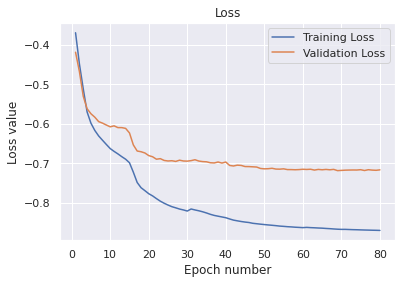

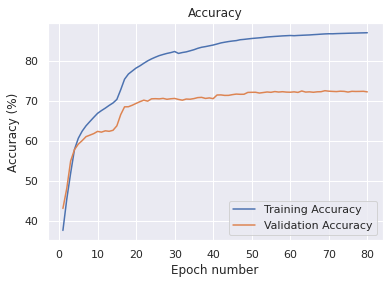

Time for running function train_model:
0.0 hours, 9.0 minutes and 58.28594446182251 seconds


In [ ]:
# The last line can be run multiple times to extend training.
train_model(model, 10, 1e-4, nn.NLLLoss(), (tdl, vdl))

# Create and train Lightning model

In [ ]:
# Install pytorch lightning on colab
!pip install lightning

INFO: Seed set to 74
INFO:lightning.fabric.utilities.seed:Seed set to 74
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name  | Type     | Params | Mode 
-------------------------------------------
0 | model | TwoLayer | 2.7 M  | train
1 | loss  | NLLLoss  | 0      | train
-------------------------------------------
2.7 M     Trainable params
0         Non-trainable params
2.7 M     Total params
10.630    Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode
INFO:lightning.

{'seed': 74, 'comment': 'TwoLayer lightning test!', 'model': {'model_name': 'TwoLayer', 'model_args': [], 'model_kwargs': {'dirname': 'TwoLayer_Lightning'}}, 'training': {'loss_fn': 'NLLLoss', 'params': 'all', 'learning_rate': 0.0001, 'trainer_kwargs': {'max_epochs': 5, 'accelerator': 'gpu', 'deterministic': True}, 'finish_training_kwargs': {'remove_bool': True, 'plot_accuracy': True}}}
Report "TwoLayer_Lightning" already exists, creating a new name: TwoLayer_Lightning - 2024-12-26 21_38_22.455429


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


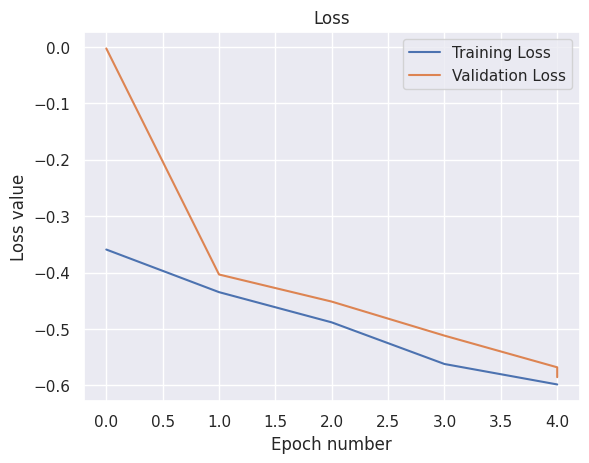

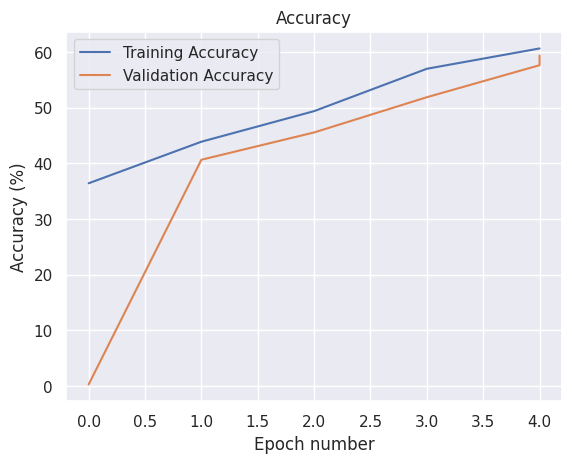

In [ ]:
from training import *
from lightning_objects import train_lightning_model

# Creating DataLodaers:
tdl = DataLoader(tds, batch_size = 1, shuffle=True)     # batch_size = 1 --> not useful for GPUs
vdl = DataLoader(vds, batch_size = 10000)

# Loading a config
import json
with open("_configs/config-two_layer.json", "r") as f:
    config = json.load(f)

# Adapting the config:
config["training"]["trainer_kwargs"]["accelerator"] = "gpu"
config["training"]["trainer_kwargs"]["max_epochs"] = 5
config["model"]["model_kwargs"]["dirname"] = "TwoLayer_Lightning"

# Training the model:
loader_tuple = (tdl, vdl)
train_lightning_model(config, loader_tuple)